# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy import stats
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ <font color=green>The distribution is heavily skewed with a long tail on the right. The mean of charges is 13270.422 with a standard deviation of 12105.48 which depicts high variability. Even though this distribution is higly skewed, since the sample size is large enough(more than 30), we can rely on CLT which states that the sampling distribution of mean charges would be get closer to normal as the sample size increases.</font>

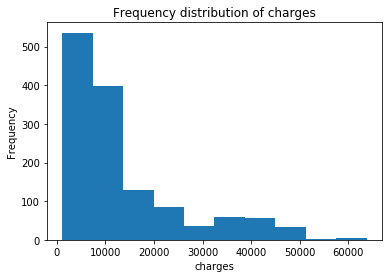

In [4]:
medical.charges.plot(kind='hist',bins=10)
plt.xlabel('charges')
plt.title('Frequency distribution of charges')
plt.show()

In [2]:
mean=round(np.mean(medical.charges),4)
std=round(np.std(medical.charges),4)
print('Mean of the charges from the sample', mean)
print('Standard deviation of the charges from the sample', std)

Mean of the charges from the sample 13270.4223
Standard deviation of the charges from the sample 12105.485


__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ <font color=green> Since the given data represent a random sample of charges, maybe the avg. charges observed here are because of this specific sample that we picked from the population data. If we take multiple random samples from the population data, we will observe different avg. charges. So, here we can conduct a significance test using t distribution(since we don't know the population parameters) for the observed data. Under this, we can calculate how likely it is to observe the given mean or more extreme data to ascertain if we this observed figure has been observed just the chance, under the assumption that the true average charges is 12000. We will do this by evaluating and interpreting the p value under the null hypothesis that the true mean is indeed 12000. </font>

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__ <font color=green>This will be a one sided interval since we are interested in whether the population parameter is BELOW a certain value. There will be a lower bound which will be calculated while the upper bound would be infinity </font>

In [3]:
#sample size
n=len(medical.charges)
#bessel corrected standard deviation
std_dev=np.std(medical.charges,ddof=1)
#estimated standard error
standard_error=std_dev/np.sqrt(n)

In [4]:
#confidence level
x=0.95
alpha=1-x
#t statistic
t_score= t.ppf(alpha,n-1)
print('t score for 95% confidence level for given sample is:', t_score)
margin_of_error=round(t_score*standard_error,4)
print('Margin of error:', margin_of_error)

t score for 95% confidence level for given sample is: -1.6459941145571317
Margin of error: -544.9351


In [5]:
lower_bound=mean+margin_of_error
#upper bound would be infinity since this is a sided confindence interval with a lower bound
print('Confidence Interval using t statistic:', (lower_bound,'infinity'))

Confidence Interval using t statistic: (12725.4872, 'infinity')


<font color=green> Since the lower bound itself of the confidence interval is greater than 12000, the administrator's concerns should be allayed. </font>

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__ <font color=green>Null Hypothesis: The difference of the mean charges for people with insurance and those without insurance is zero.<br>Alternative Hypothesis: The difference of the mean charges for people with insurance and those without insurance is not zero.<br> Under the pooled approach, it is assumed that the variance of the charges for people with insurance and that for those without insurance are equal.

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ <font color=green> As the calculations below show, the results obtained from both approaches are same</font>

<font color=green> We are making the following assumptions for the two samples(with insurance and without insurance)<br>1. The two samples are randomly drawn from the population and independent of each other.<br>2. Data in both samples are normally distributed. If that is not the case, we can rely on CLT since the sample sizes of both are sufficiently large(mpre than 30)</font>

In [30]:
#sample size of people with insurance
n_0=len(medical[medical['insuranceclaim']==1])
#sample size of people without insurance
n_1=len(medical[medical['insuranceclaim']==0])
#creating dataframe of required data 
grouped=medical.groupby('insuranceclaim')['charges'].agg([np.mean,np.std])
#mean charges for people with insurance
x_0=grouped.loc[1,'mean']
#mean charges for people without insurance
x_1=grouped.loc[0,'mean']
#standard deviation of charges for people with insurance
s_0=grouped.loc[1,'std']
#standard deviation of charges for people without insurance
s_1=grouped.loc[0,'std']

In [32]:
#calculating pooled sample standard deviation
s_p= np.sqrt(((n_0-1)*(s_0**2)+(n_1-1)*(s_1**2))/(n_0+n_1-2))
#calculating t statistic
t_statistic=(x_0-x_1)/(s_p*np.sqrt((1/n_0)+(1/n_1)))
print('t statistic is:', t_statistic)

t statistic is: 11.89329903087671


In [47]:
#degrees of freedom
df=n_0+n_1-2
#p value
p = (1.0 - t.cdf((t_statistic), df)) * 2.0
print('manually calculated p value',p)

manually calculated p value 0.0


In [56]:
with_insurance_claim=medical[medical['insuranceclaim']==1].charges
without_insurance_claim=medical[medical['insuranceclaim']==0].charges
print('Results using inbuilt functions:',stats.ttest_ind(with_insurance_claim,without_insurance_claim))

Results using inbuilt functions: Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)


<font color=green> The p value is very small, almost 0. If we are testing our hypothesis at a significance level of 0.05, we would reject the null hypothesis based on this p-value. This means that there may indeed be significant difference in the charges for those with insurance claims and for those without insurance claims.</font>

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

In [51]:
print(stats.ttest_ind.__doc__)


    Calculate the T-test for the means of *two independent* samples of scores.

    This is a two-sided test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.

    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test, which does not assume equal
        population variance [2]_.

        .. versionadded:: 0.11.0
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input con

__A:__ <font color=green> As shown in the documentation above, we can set the argument equal_var=False to drop the assumption that the variances of the two samples are equal</font>

In [52]:
print('Results without eqaul variances assumption:', stats.ttest_ind(with_insurance_claim,without_insurance_claim, equal_var=False))

Results without eqaul variances assumption: Ttest_indResult(statistic=13.298031957975649, pvalue=1.1105103216309125e-37)


__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ <font color=green>There doesn't appear to be an equivalent function for performing z-test</font>

In [54]:
print(stats.__doc__)


Statistical functions (:mod:`scipy.stats`)

.. currentmodule:: scipy.stats

This module contains a large number of probability distributions as
well as a growing library of statistical functions.

Each univariate distribution is an instance of a subclass of `rv_continuous`
(`rv_discrete` for discrete distributions):

.. autosummary::
   :toctree: generated/

   rv_continuous
   rv_discrete
   rv_histogram

Continuous distributions

.. autosummary::
   :toctree: generated/

   alpha             -- Alpha
   anglit            -- Anglit
   arcsine           -- Arcsine
   argus             -- Argus
   beta              -- Beta
   betaprime         -- Beta Prime
   bradford          -- Bradford
   burr              -- Burr (Type III)
   burr12            -- Burr (Type XII)
   cauchy            -- Cauchy
   chi               -- Chi
   chi2              -- Chi-squared
   cosine            -- Cosine
   crystalball       -- Crystalball
   dgamma            -- Double Gamma
   dweibull          -

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test